At the beginning of the course, we saw that there are two types of data visualization:

* Exploratory data visualization: we build graphs for ourselves to explore data and find patterns.
* Explanatory data visualization: we build graphs for others to communicate and explain the patterns we've found through exploring data.

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
metro_traffic= pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')

In [3]:
metro_traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
metro_traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
metro_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
metro_traffic.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,48204,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,12,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,48143,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


## Instruction:

* Add the %matplotlib inline magic.
* Plot a histogram to examine the distribution of the traffic_volume column. Use a Pandas method.
* Use `Series.describe()` to look up a few statistics about the traffic_volume column.
* Note a few observations about the distribution of traffic_volume based on the histogram and the result of `Series.describe()`.
* Do you think daytime and nighttime influence the traffic volume?

In [7]:
metro_traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

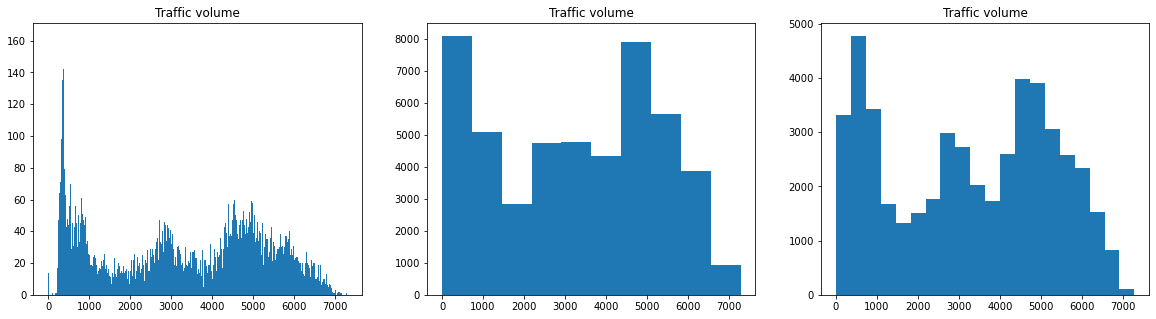

In [8]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 3 cols, subplot 1
plt.subplot(1, 3, 1) 
bins = np.arange(0, metro_traffic['traffic_volume'].max()+4, 4)
plt.hist(data = metro_traffic, x = 'traffic_volume', bins = bins)
plt.title('Traffic volume')

# histogram on right, example of too-small bin size
plt.subplot(1, 3, 2) # 1 row, 3 cols, subplot 2
plt.hist(metro_traffic['traffic_volume'])
plt.title('Traffic volume')

# histogram on right, example of too-small bin size
plt.subplot(1, 3, 3) # 1 row, 3 cols, subplot 3
plt.hist(data = metro_traffic, x = 'traffic_volume', bins = 20)
plt.title('Traffic volume');

from the histogram, we can come up with the following deductions:
* the histogram is normally distributed.
* there are three peaks which tells us that in most cases, the highest traffic was caused when 900-1600 cars, 3000-4000 cars, 5000-6000 cars were passing through the station in each hour.

from the `describe` i can see;
* About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
* About 75% of the time, the traffic volume was four times as much (4,933 cars or more).


This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

## instructions:

* Transform the date_time column to datetime by using the function `pd.to_datetime()`.
* Use the `Series.dt.hour` property to get the hour of every instance of the `date_time column` and do the following:
* Isolate the daytime data.
* Isolate the nighttime data.

In [9]:
#convert the date to date time 
import datetime as dt
metro_traffic['date_time']=pd.to_datetime(metro_traffic['date_time'])

In [10]:
date_time_hr=metro_traffic['date_time'].dt.hour

metro_traffic_copy=metro_traffic.copy()
#we applied this change in the copy so that it wont be refelected in our original dataframe
day = metro_traffic_copy[(date_time_hr >= 7) & (date_time_hr < 19)] 

night = metro_traffic_copy[(date_time_hr >= 19) | (date_time_hr < 7)]


Previously, we divided the dataset into two parts:

* Daytime data: hours from 7 AM to 7 PM (12 hours)
* Nighttime data: hours from 7 PM to 7 AM (12 hours)

Now we're going to compare the traffic volume at night and during day.

## Instructions

* Plot the histograms of traffic_volume for both day and night. Organize the two histograms side-by-side on a grid chart.

For both histograms, do the following:
* Add a title.
* Add x- and y-labels.

* Bring the x- and the y-axis to the same ranges (this will help you compare the histograms correctly).

* Use Series.describe() to look up a few statistics for traffic_volume for both day and night.
* Analyze the results:
  * What shape do the histograms have and what does that indicate?
  *  the traffic is light at night, and our goal is to find indicators of heavy traffic, should we still be using the nighttime data?

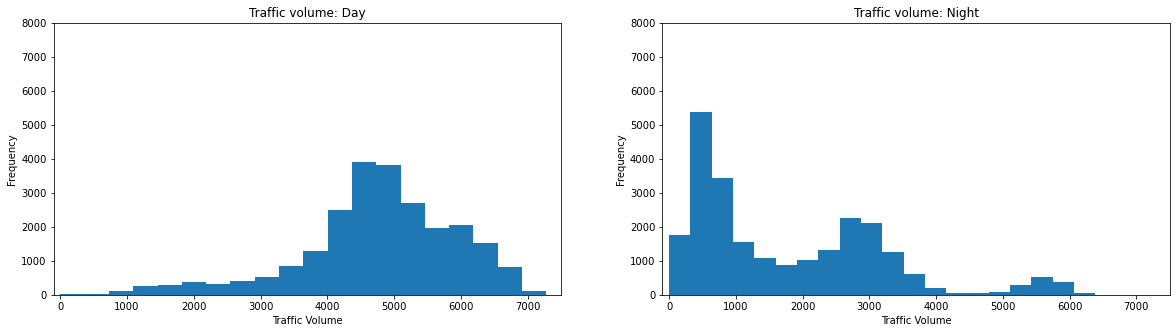

In [11]:
plt.figure(figsize = [20, 5]) 

# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
plt.hist(data = day, x = 'traffic_volume', bins = 20)
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Traffic volume: Day');

# 1 row, 2 cols, subplot 2
plt.subplot(1, 2, 2) 
plt.hist(data = night, x = 'traffic_volume', bins = 20)
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Traffic volume: Night');

In [12]:
print(day['traffic_volume'].describe())
print('\n')
print(night['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


from the above visualization, I observed the folowing:

* there seem to be more traffic in the day than there are in the night.
* most of the times, there are no fewer than 5000 cars on that route
* the traffic volume in the night isnt much, at most, there are no fewer than 1000 cars moving on taht route per hour


we have determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

The fastest way to get the average traffic volume for each month is by using the `DataFrame.groupby()` method. 

In the code below, we'll do the following:

* Use `day['date_time'].dt.month` to create a new column where each value describes the month when the traffic volume measurement was taken.
* Use `day.groupby('month').mean()` to group the dataset by the month column with the mean as an aggregate function.

In [13]:
metro_traffic.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767


In [14]:
#create a new column for month
day['month']=day['date_time'].dt.month

C:\Users\PC\AppData\Local\Temp\ipykernel_368\3399633742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['month']=day['date_time'].dt.month


In [15]:
#Use day.groupby('month').mean() to group the dataset by the month column with the mean as an aggregate function.
by_month = day.groupby('month').mean()

by_month['traffic_volume']

C:\Users\PC\AppData\Local\Temp\ipykernel_368\1812722579.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = day.groupby('month').mean()


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

## Instruction:
* Generate a line plot to visualize how the traffic volume changed each month on average.
* Analyze the line plot. Do you notice any interesting exception?

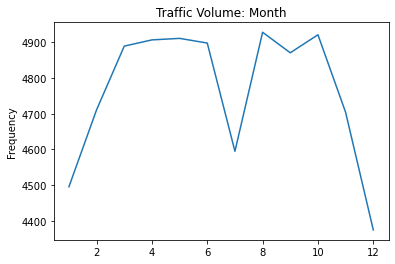

In [28]:
#plot line graph
plt.plot(by_month['traffic_volume'])
#plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Traffic Volume: Month');

* from our graph, we can see that there are low traffic volume in January, july and december. this could probably be because of the holidays
* I can also see that the volume of cars on that route increased tremendously around late february, early september and october. 


lets go further to check the traffic volume in each day of the week. let's repeat the same process as we did for `month` column

In [17]:
day['dayofweek']=day['date_time'].dt.dayofweek

by_dayofweek=day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']
# 0 is monday, 6 is Sunday

C:\Users\PC\AppData\Local\Temp\ipykernel_368\2109598012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['dayofweek']=day['date_time'].dt.dayofweek
C:\Users\PC\AppData\Local\Temp\ipykernel_368\2109598012.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_dayofweek=day.groupby('dayofweek').mean()


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

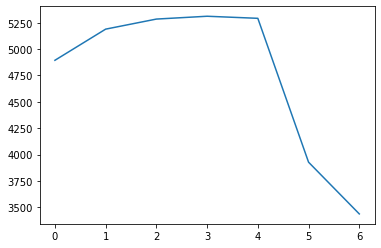

In [18]:
#create a line plot

plt.plot(by_dayofweek['traffic_volume']);

from above, we can see that;
* the least traffic occurs during the weekday and most tarffic occurs during the week. this makes sense becasue more people are going to work and other places during the week.
* i can see that most traffic occurs on wednesdays and thursdays. This is an interesting observatiion becasue i'd expect mondays and tuesdays to have the most traffic since it is the start of a new work week.

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [19]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print('\n')
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_368\3700938008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['hour'] = day['date_time'].dt.hour
C:\Users\PC\AppData\Local\Temp\ipykernel_368\3700938008.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_business = business_days.groupby('hour').mean()
C:\Users\PC\AppData\Local\Temp\ipykernel_368\3700938008.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only c

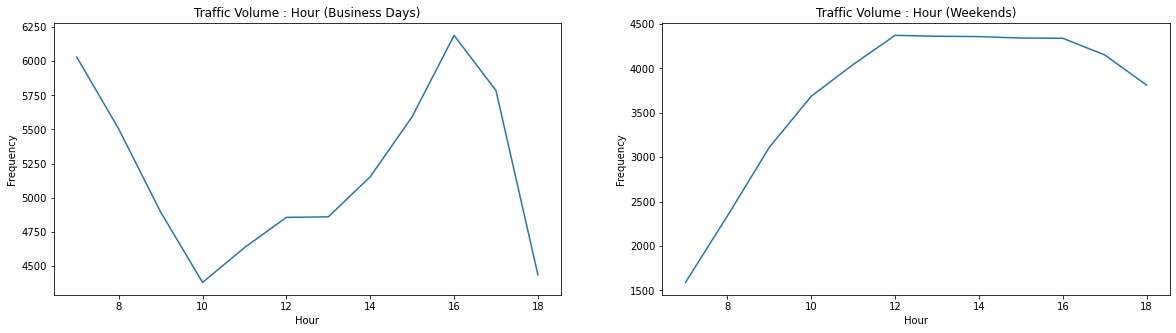

In [20]:
#lets plot the line graphs separately

plt.figure(figsize = [20, 5]) 

plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Traffic Volume : Hour (Business Days)')
plt.xlabel('Hour')
plt.ylabel('Frequency');

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic Volume : Hour (Weekends)')
plt.xlabel('Hour')
plt.ylabel('Frequency');


we made some interesting observations from our line graphs above:
in business days;
* we notice that the traffic is heavy during the early hours of the morning (7-8am) and drops drastically from 10am-11am. this is probably beacause there are a lot of people commuting to work around 7am-8am.
* i also noticed that the traffic volume picks up from 3pm-4pm. this is probably this timeframe is usually the close of work and people are going home for the day. 

in the weekends;
* i noticed that the traffic is light in the early hours of the morining and picks up around 11am-3pm. since it is the weekend, it is understandable thatb traffic is light in the morning. people are propbably resting or during some house chores, and around mid morning to afternoon, most people will want to step outside for one or two things...

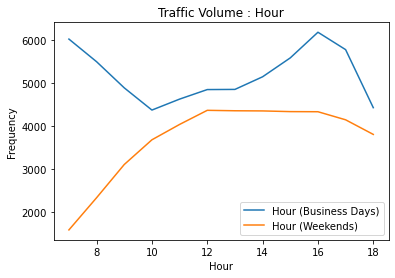

In [21]:
#let's plot the graphs together

plt.plot(by_hour_business['traffic_volume'],label='Hour (Business Days)')
plt.plot(by_hour_weekend['traffic_volume'],label='Hour (Weekends)')
plt.legend();
plt.title('Traffic Volume : Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency');


So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

## Instructions:

* Find the correlation values between `traffic_volume` and the numerical weather columns.
* Find the weather column with the strongest correlation with `traffic_volume` and plot a scatter plot for this weather column and `traffic_volume`.
* Do any of these weather columns seem like reliable indicators for heavy traffic?

remember, Pearson's r values lie between -1.00 and +1.00. when the positive correlation is perfect, the pearson's r is equal to +1.00. When the negative correlation is perfect, the pearson's r is equal to -1.00. A value of 0.0 shows no correlation

## instructions:

* Find the correlation values between traffic_volume and the numerical weather columns.
* Find the weather column with the strongest correlation with traffic_volume and plot a scatter plot for this weather column and traffic_volume.
* Do any of these weather columns seem like reliable indicators for heavy traffic?

In [22]:
day.corr()['traffic_volume']

C:\Users\PC\AppData\Local\Temp\ipykernel_368\3421110943.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day.corr()['traffic_volume']


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

the weather column with the strongest corelation with `traffic_volume` is `temp`, so we are going to plot it against the `traffic_volume`

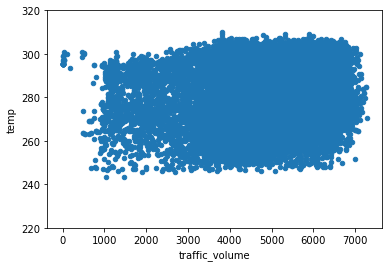

In [23]:
day.plot.scatter(x='traffic_volume',y='temp')
plt.ylim(220, 320);

from our visualization, i don't think any of these weathers are a strong indicator of heavy traffic. although temperature has the strongest correlation among other weather columns, the correlation is still very weak and unrelaible.


To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

We're going to calculate the average traffic volume associated with each unique value in these two columns. We've already calculated the values for you — we grouped the data by `weather_main` and `weather_description` while using the mean as an aggregate function.

## instructions:

* Plot a horizontal bar plot for the `traffic_volume` column of `by_weather_main`.
* Analyze the bar plot. Is there any `traffic volume` exceeding 5,000 cars? Can you find any weather type as a heavy traffic indicator?
* Plot a horizontal bar plot for the `traffic_volume` column of by_weather_description. This column has many unique values, so you'll need to enlarge the figure size to make it readable. You can use plt.figure(figsize=(width,height)) or `Series.plot.barh(figsize=(width,height))`.
* Analyze the bar plot. Is there any traffic volume exceeding 5,000 cars? Can you find any weather type as a heavy traffic indicator?
* Write up your conclusions for the entire project — this was the last step.

In [24]:
by_weather_main=day.groupby('weather_main').mean()
by_weather_main['traffic_volume']

C:\Users\PC\AppData\Local\Temp\ipykernel_368\3028486907.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_main=day.groupby('weather_main').mean()


weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64

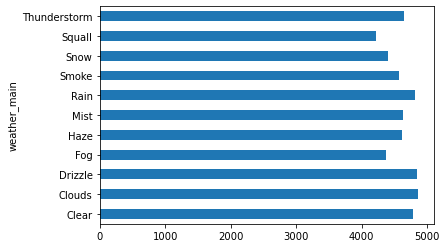

In [25]:
by_weather_main['traffic_volume'].plot.barh();

In [26]:
by_weather_description=day.groupby('weather_description').mean()
by_weather_description['traffic_volume']

C:\Users\PC\AppData\Local\Temp\ipykernel_368\2121405442.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_description=day.groupby('weather_description').mean()


weather_description
SQUALLS                                4211.000000
Sky is Clear                           4919.009390
broken clouds                          4824.130326
drizzle                                4737.330935
few clouds                             4839.818023
fog                                    4372.491713
freezing rain                          4314.000000
haze                                   4609.893285
heavy intensity drizzle                4738.586207
heavy intensity rain                   4610.356164
heavy snow                             4411.681250
light intensity drizzle                4890.164049
light intensity shower rain            4558.100000
light rain                             4859.650849
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4430.858896
mist                                   4623.976475
moderate rain                          4769.643312
overcast cl

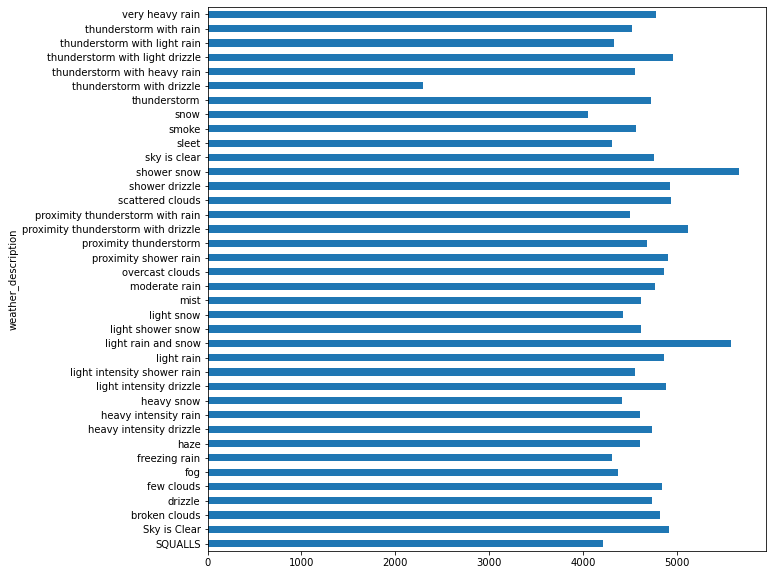

In [27]:
plt.figure(figsize = [10, 10]) 
by_weather_description['traffic_volume'].plot.barh();

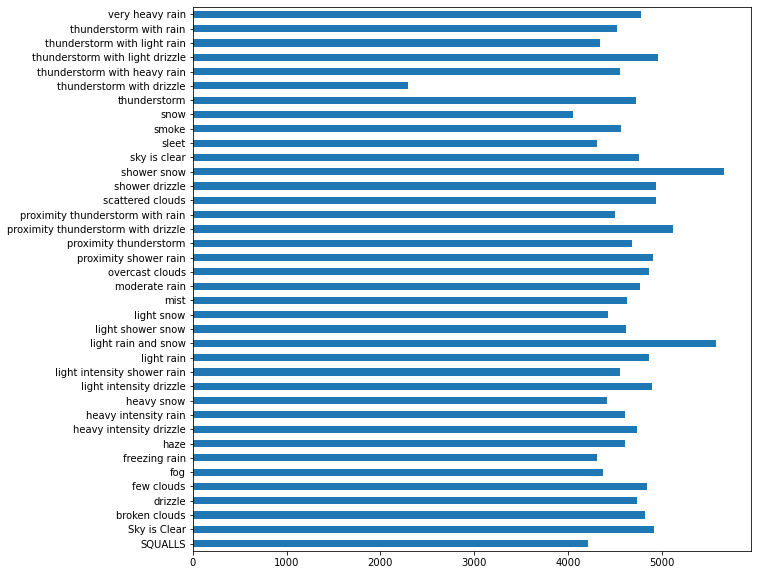

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 10])
by_weather_description['traffic_volume'].plot.barh()
plt.gca().set_ylabel('')
plt.show()


* proximity thunder storm with drizzle,shower snow, and light rain and snow seem to be indicators of heavy traffic. As we can see, there are over 5000 cars on that route per hour during those weather conditons.

* generally, we can see that when there is thundrestorm, heavy rain and snowing, there are generally more traffic in that route.

## Summary

we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* Time indicators
  * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
  * The traffic is usually heavier on business days compared to the weekends.
  * On business days, the rush hours are around 7 and 16.
  
* Weather indicators
  * Shower snow
  * Light rain and snow
  * Proximity thunderstorm with drizzle
  
## More work to do
Next steps include the following:

* Use the nighttime data to look for heavy traffic indicators.
* Find more time and weather indicators.
